In [1]:
# Cargamos librerias
import os
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [2]:
os.environ['WD_PATH'] = './drivers'

ruta = ChromeDriverManager().install()

service = Service(executable_path=ruta)

In [3]:
ruta

'C:\\Users\\bc.mgutierrez\\.wdm\\drivers\\chromedriver\\win64\\126.0.6478.63\\chromedriver-win32/chromedriver.exe'

In [4]:
s = Service(ruta)

In [16]:
import time
import logging
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

In [288]:
def iniciar_chrome():
    ## Inicia Chrome con los parámetros indicados y devuelve el driver
    ## Configura el nivel de registro para webdriver_manager
    logging.getLogger("webdriver_manager").setLevel(logging.ERROR)

    ## Instalamos la versión de chromedriver correspondiente. Nos devuelve la ruta completa del ejecutable
    ruta = ChromeDriverManager().install()

    ## OPCIONES DE CHROME
    options = Options()  ## Instanciamos las opciones de Chrome
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36"
    options.add_argument(f"user-agent={user_agent}")  # Define un user agent personalizado
    # options.add_argument("--window-size=1000,1000")  # Para configurar el alto y ancho de la ventana de chrome
    options.add_argument("--start-maximized")  # Para maximizar la ventana de chrome (solo funciona si la línea de arriba no se encuentra activa)
    options.add_argument("--disable-web-security")  # Deshabilita la política del mismo origen
    options.add_argument("--disable-notifications")  # Para bloquear las notificaciones de Chrome
    options.add_argument("--ignore-certificate-errors")  # Para ignorar el aviso "su conexión no es privada"
    options.add_argument("--no-sandbox")  # Deshabilita el modo sandbox
    options.add_argument("--log-level=3")  # Para que chrome driver no muestre nada en la terminal
    options.add_argument("--allow-running-insecure-content")  # Desactiva el aviso de "contenido no disponible"
    options.add_argument("--no-default-browser-check")  # Evita el aviso de que Chrome no es el navegador por defecto
    options.add_argument("--no-first-run")  # Evita la ejecución de ciertas tareas que se realizan la primera vez que se ejecutan
    options.add_argument("--no-proxy-server")  # Para no usar proxy, sino conexiones directas
    options.add_argument("--disable-blink-features=AutomationControlled")  # Evita que selenium sea detectado por la web
    ##PARAMETROS A OMITIR EN EL INICIO DE CHROMEDRIVER
    exp_opt = [
        'enable-automation', #Para que no muestre la notificacion "Un software automatizado de pruebas esta utilizando chrome"
        'ignore-certificate-errors',#Para ignorar errores de certificados (a veces estan caducados)
        'enable-logging'#Para que no se muestre la teriman 'DevTools listening on...'
    ]
    options.add_experimental_option("excludeSwitches", exp_opt)
    #PARAMETROS QUE DEFINENE PREFERNCIAS DE CHROMEDRIVER
    prefs = {
        "profile-default_content_setting_values.notifications" : 2, #Notificaciones: 0=preguntar | 1=permitir | 2=no permitir
        "intl.accept_languages": ["es-ES", "es"],#Para definir el idioma del navegador
        "credentials_enable_service": False #Para evir que chrome nos pregunte si queremos guardar la contraseña al logearnos
    }
    options.add_experimental_option("prefs",prefs)
    ## Instanciamos el servicio de chromedriver
    s = Service(ruta)
    ## Instanciamos webdriver de selenium en chrome
    driver = webdriver.Chrome(service=s, options=options)  # Añadimos el argumento options

    ## Devolver el driver
    return driver

# MAIN #########################################################################

if __name__ == '__main__':

    #2022-2023
    driver = iniciar_chrome()
    url= "https://fbref.com/es/comps/9/2022-2023/Estadisticas-2022-2023-Premier-League"
    driver.get(url)



    #Tabla en la que esta contenida la info
    tabla = driver.find_element(By.CSS_SELECTOR, 'table.stats_table.sortable.min_width.force_mobilize.now_sortable.sticky_table.eq2.re2.le2')
 
    #Traer todas las etiquetas <th> que tienen la clase right dentro de la tabla
    posiciones = tabla.find_elements(By.CSS_SELECTOR, 'th.right')

    #todas las etiquetas <td> que tienen el atributo data-stat="team" dentro de la tabla
    equipos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="team"]')

    # Encontrar todos los datos adicionales según sus atributos data-stat
    partidos_jugados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="games"]')
    partidos_ganados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="wins"]')
    partidos_empatados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="ties"]')
    partidos_perdidos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="losses"]')
    goles_a_favor = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_for"]')
    goles_en_contra = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_against"]')
    diferencia_goles = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goal_diff"]')
    puntos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points"]')
    puntos_por_partido = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points_avg"]')
    xG = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_for"]')
    xGA = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_against"]')
    xGD = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff"]')
    xGD_per_90 = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff_per90"]')
    asistencia_promedio = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="attendance_per_g"]')
    maximo_goleador = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_team_scorers"]')
    portero_destacado = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_keeper"]')

    #Creamos una lista para guardar el arreglo de datos 
    lista_2022_2023 = []

    # Iterar sobre la lista de posiciones (que se asume tiene la misma longitud que todas las demás listas)
    for i in range(len(posiciones)):
        # Obtener el texto de cada elemento correspondiente
        posicion = posiciones[i].text
        equipo = equipos[i].text
        pj = partidos_jugados[i].text
        pg = partidos_ganados[i].text
        pe = partidos_empatados[i].text
        pp = partidos_perdidos[i].text
        gf = goles_a_favor[i].text
        gc = goles_en_contra[i].text
        dg = diferencia_goles[i].text
        pts = puntos[i].text
        pts_pj = puntos_por_partido[i].text
        xg = xG[i].text
        xga = xGA[i].text
        xgd = xGD[i].text
        xgd_90 = xGD_per_90[i].text
        asistencia = asistencia_promedio[i].text
        max_goleador = maximo_goleador[i].text
        portero = portero_destacado[i].text

        #Agregar los datos a la lista 
        lista_2022_2023.append([posicion, equipo, pj, pg, pe, pp, gf, gc, dg, pts, pts_pj, xg, xga, xgd, xgd_90, asistencia, max_goleador, portero])

        # Imprimir la información obtenida
        print(f"Posición: {posicion}, Equipo: {equipo}, PJ: {pj}, PG: {pg}, PE: {pe}, PP: {pp}, GF: {gf}, GC: {gc}, DG: {dg}, Pts: {pts}, Pts/PJ: {pts_pj}, xG: {xg}, xGA: {xga}, xGD: {xgd}, xGD/90: {xgd_90}, Asistencia: {asistencia}, Máximo Goleador: {max_goleador}, Portero: {portero}")
    

        
    #tr_tag1 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="1"]').text
    #tr_tag2 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="2"]').text
    #tr_tag3 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="3"]').text
    #tr_tag4 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="4"]').text
    #tr_tag5 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="5"]').text
    #tr_tag6 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="6"]').text
    #tr_tag7 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="7"]').text
    #tr_tag8 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="8"]').text
    #tr_tag9 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="9"]').text
    #tr_tag10 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="10"]').text
    #tr_tag11 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="11"]').text
    #tr_tag12 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="12"]').text
    #tr_tag13 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="13"]').text
    #tr_tag14 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="14"]').text
    #tr_tag15 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="15"]').text
    #tr_tag16 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="16"]').text
    #tr_tag17 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="17"]').text
    #tr_tag18 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="18"]').text
    #tr_tag19 = driver.find_element(By.CSS_SELECTOR, 'tr[data-row="19"]').text


    #print(f'Posicion 2: {tr_tag1}')
    #print(f'Posicion 3: {tr_tag2}')
    #print(f'Posicion 4: {tr_tag3}')
    #print(f'Posicion 5: {tr_tag4}')
    #print(f'Posicion 6: {tr_tag5}')
    #print(f'Posicion 7: {tr_tag6}')
    #print(f'Posicion 8: {tr_tag7}')
    #print(f'Posicion 9: {tr_tag8}')
    #print(f'Posicion 10: {tr_tag9}')
    #print(f'Posicion 11: {tr_tag10}')
    #print(f'Posicion 12: {tr_tag11}')
    #print(f'Posicion 13: {tr_tag12}')
    #print(f'Posicion 14: {tr_tag13}')
    #print(f'Posicion 15: {tr_tag14}')
    #print(f'Posicion 16: {tr_tag15}')
    #print(f'Posicion 17: {tr_tag16}')
    #print(f'Posicion 18: {tr_tag17}')
    #print(f'Posicion 19: {tr_tag18}')
    #print(f'Posicion 20: {tr_tag19}')

    


# Cerrar el navegador

    #input("Pulsar ENTER para salir")


Posición: 1, Equipo: Manchester City, PJ: 38, PG: 28, PE: 5, PP: 5, GF: 94, GC: 33, DG: +61, Pts: 89, Pts/PJ: 2.34, xG: 78.6, xGA: 32.1, xGD: +46.5, xGD/90: +1.22, Asistencia: 53,249, Máximo Goleador: Erling Haaland - 36, Portero: Ederson
Posición: 2, Equipo: Arsenal, PJ: 38, PG: 26, PE: 6, PP: 6, GF: 88, GC: 43, DG: +45, Pts: 84, Pts/PJ: 2.21, xG: 71.7, xGA: 42.0, xGD: +29.7, xGD/90: +0.78, Asistencia: 60,191, Máximo Goleador: Martin Ødegaard, Gabriel Martinelli - 15, Portero: Aaron Ramsdale
Posición: 3, Equipo: Manchester Utd, PJ: 38, PG: 23, PE: 6, PP: 9, GF: 58, GC: 43, DG: +15, Pts: 75, Pts/PJ: 1.97, xG: 67.7, xGA: 50.4, xGD: +17.3, xGD/90: +0.45, Asistencia: 73,671, Máximo Goleador: Marcus Rashford - 17, Portero: David de Gea
Posición: 4, Equipo: Newcastle Utd, PJ: 38, PG: 19, PE: 14, PP: 5, GF: 68, GC: 33, DG: +35, Pts: 71, Pts/PJ: 1.87, xG: 71.9, xGA: 39.5, xGD: +32.3, xGD/90: +0.85, Asistencia: 52,127, Máximo Goleador: Callum Wilson - 18, Portero: Nick Pope
Posición: 5, Equipo

In [23]:
#Creamos una lista para las columnas
Columnas = ['Posición', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia', 'Maximo Goleador', 'Portero']
Partidos_2022_2023 = pd.DataFrame(lista_2022_2023, columns=Columnas)

In [24]:
Partidos_2022_2023

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero
0,1,Manchester City,38,28,5,5,94,33,+61,89,2.34,78.6,32.1,+46.5,+1.22,"53,249",Erling Haaland - 36,Ederson
1,2,Arsenal,38,26,6,6,88,43,+45,84,2.21,71.7,42.0,+29.7,+0.78,"60,191","Martin Ødegaard, Gabriel Martinelli - 15",Aaron Ramsdale
2,3,Manchester Utd,38,23,6,9,58,43,+15,75,1.97,67.7,50.4,+17.3,+0.45,"73,671",Marcus Rashford - 17,David de Gea
3,4,Newcastle Utd,38,19,14,5,68,33,+35,71,1.87,71.9,39.5,+32.3,+0.85,"52,127",Callum Wilson - 18,Nick Pope
4,5,Liverpool,38,19,10,9,75,47,+28,67,1.76,72.6,50.9,+21.7,+0.57,"53,163",Mohamed Salah - 19,Alisson
5,6,Brighton,38,18,8,12,72,53,+19,62,1.63,73.3,50.2,+23.1,+0.61,"31,477",Alexis Mac Allister - 10,Robert Sánchez
6,7,Aston Villa,38,18,7,13,51,46,+5,61,1.61,50.3,52.5,-2.2,-0.06,"39,485",Ollie Watkins - 15,Emiliano Martínez
7,8,Tottenham,38,18,6,14,70,63,+7,60,1.58,57.0,49.6,+7.4,+0.20,"61,585",Harry Kane - 30,Hugo Lloris
8,9,Brentford,38,15,14,9,58,46,+12,59,1.55,56.6,49.8,+6.7,+0.18,"17,078",Ivan Toney - 20,David Raya
9,10,Fulham,38,15,7,16,55,53,+2,52,1.37,46.2,63.6,-17.4,-0.46,"23,746",Aleksandar Mitrović - 14,Bernd Leno


In [25]:
    #2023 - 2024
    url= "https://fbref.com/es/comps/9/Estadisticas-de-Premier-League"
    driver.get(url)

    #Tabla en la que esta contenida la info
    tabla = driver.find_element(By.CSS_SELECTOR, 'table.stats_table.sortable.min_width.force_mobilize.now_sortable.sticky_table.eq2.re2.le2')
 
    #Traer todas las etiquetas <th> que tienen la clase right dentro de la tabla
    posiciones = tabla.find_elements(By.CSS_SELECTOR, 'th.right')

    #todas las etiquetas <td> que tienen el atributo data-stat="team" dentro de la tabla
    equipos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="team"]')

    # Encontrar todos los datos adicionales según sus atributos data-stat
    partidos_jugados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="games"]')
    partidos_ganados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="wins"]')
    partidos_empatados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="ties"]')
    partidos_perdidos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="losses"]')
    goles_a_favor = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_for"]')
    goles_en_contra = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_against"]')
    diferencia_goles = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goal_diff"]')
    puntos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points"]')
    puntos_por_partido = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points_avg"]')
    xG = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_for"]')
    xGA = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_against"]')
    xGD = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff"]')
    xGD_per_90 = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff_per90"]')
    asistencia_promedio = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="attendance_per_g"]')
    maximo_goleador = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_team_scorers"]')
    portero_destacado = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_keeper"]')

    lista_2023_2024 = []


    # Iterar sobre la lista de posiciones (que se asume tiene la misma longitud que todas las demás listas)
    for i in range(len(posiciones)):
        # Obtener el texto de cada elemento correspondiente
        posicion = posiciones[i].text
        equipo = equipos[i].text
        pj = partidos_jugados[i].text
        pg = partidos_ganados[i].text
        pe = partidos_empatados[i].text
        pp = partidos_perdidos[i].text
        gf = goles_a_favor[i].text
        gc = goles_en_contra[i].text
        dg = diferencia_goles[i].text
        pts = puntos[i].text
        pts_pj = puntos_por_partido[i].text
        xg = xG[i].text
        xga = xGA[i].text
        xgd = xGD[i].text
        xgd_90 = xGD_per_90[i].text
        asistencia = asistencia_promedio[i].text
        max_goleador = maximo_goleador[i].text
        portero = portero_destacado[i].text

        lista_2023_2024.append([posicion, equipo, pj, pg, pe, pp, gf, gc, dg, pts, pts_pj, xg, xga, xgd, xgd_90, asistencia, max_goleador, portero])


        # Imprimir la información obtenida
        print(f"Posición: {posicion}, Equipo: {equipo}, PJ: {pj}, PG: {pg}, PE: {pe}, PP: {pp}, GF: {gf}, GC: {gc}, DG: {dg}, Pts: {pts}, Pts/PJ: {pts_pj}, xG: {xg}, xGA: {xga}, xGD: {xgd}, xGD/90: {xgd_90}, Asistencia: {asistencia}, Máximo Goleador: {max_goleador}, Portero: {portero}")
    

Posición: 1, Equipo: Manchester City, PJ: 38, PG: 28, PE: 7, PP: 3, GF: 96, GC: 34, DG: +62, Pts: 91, Pts/PJ: 2.39, xG: 80.5, xGA: 35.6, xGD: +44.9, xGD/90: +1.18, Asistencia: 53,012, Máximo Goleador: Erling Haaland - 27, Portero: Ederson
Posición: 2, Equipo: Arsenal, PJ: 38, PG: 28, PE: 5, PP: 5, GF: 91, GC: 29, DG: +62, Pts: 89, Pts/PJ: 2.34, xG: 76.1, xGA: 27.9, xGD: +48.2, xGD/90: +1.27, Asistencia: 60,236, Máximo Goleador: Bukayo Saka - 16, Portero: David Raya
Posición: 3, Equipo: Liverpool, PJ: 38, PG: 24, PE: 10, PP: 4, GF: 86, GC: 41, DG: +45, Pts: 82, Pts/PJ: 2.16, xG: 87.8, xGA: 45.7, xGD: +42.0, xGD/90: +1.11, Asistencia: 55,979, Máximo Goleador: Mohamed Salah - 18, Portero: Alisson
Posición: 4, Equipo: Aston Villa, PJ: 38, PG: 20, PE: 8, PP: 10, GF: 76, GC: 61, DG: +15, Pts: 68, Pts/PJ: 1.79, xG: 63.3, xGA: 59.9, xGD: +3.4, xGD/90: +0.09, Asistencia: 41,858, Máximo Goleador: Ollie Watkins - 19, Portero: Emiliano Martínez
Posición: 5, Equipo: Tottenham, PJ: 38, PG: 20, PE: 6

In [26]:
#Creamos una lista para las columnas
Columnas = ['Posición', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia', 'Maximo Goleador', 'Portero']
Partidos_2023_2024 = pd.DataFrame(lista_2023_2024, columns=Columnas)

In [27]:
Partidos_2023_2024

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero
0,1,Manchester City,38,28,7,3,96,34,+62,91,2.39,80.5,35.6,+44.9,+1.18,"53,012",Erling Haaland - 27,Ederson
1,2,Arsenal,38,28,5,5,91,29,+62,89,2.34,76.1,27.9,+48.2,+1.27,"60,236",Bukayo Saka - 16,David Raya
2,3,Liverpool,38,24,10,4,86,41,+45,82,2.16,87.8,45.7,+42.0,+1.11,"55,979",Mohamed Salah - 18,Alisson
3,4,Aston Villa,38,20,8,10,76,61,+15,68,1.79,63.3,59.9,+3.4,+0.09,"41,858",Ollie Watkins - 19,Emiliano Martínez
4,5,Tottenham,38,20,6,12,74,61,+13,66,1.74,68.2,63.4,+4.8,+0.13,"61,482",Son Heung-min - 17,Guglielmo Vicario
5,6,Chelsea,38,18,9,11,77,63,+14,63,1.66,74.5,58.1,+16.4,+0.43,"39,524",Cole Palmer - 22,Đorđe Petrović
6,7,Newcastle Utd,38,18,6,14,85,62,+23,60,1.58,76.0,61.4,+14.6,+0.38,"52,125",Alexander Isak - 21,Martin Dúbravka
7,8,Manchester Utd,38,18,6,14,57,58,-1,60,1.58,56.5,68.9,-12.5,-0.33,"73,533","Rasmus Højlund, Bruno Fernandes - 10",André Onana
8,9,West Ham,38,14,10,14,60,74,-14,52,1.37,52.3,71.1,-18.8,-0.49,"62,567",Jarrod Bowen - 16,Alphonse Areola
9,10,Crystal Palace,38,13,10,15,57,58,-1,49,1.29,48.6,52.0,-3.4,-0.09,"24,932",Jean-Philippe Mateta - 16,Sam Johnstone


In [28]:
    #2021 - 2022
    url= "https://fbref.com/es/comps/9/2021-2022/Estadisticas-2021-2022-Premier-League"
    driver.get(url)

    #Tabla en la que esta contenida la info
    tabla = driver.find_element(By.CSS_SELECTOR, 'table.stats_table.sortable.min_width.force_mobilize.now_sortable.sticky_table.eq2.re2.le2')
 
    #Traer todas las etiquetas <th> que tienen la clase right dentro de la tabla
    posiciones = tabla.find_elements(By.CSS_SELECTOR, 'th.right')

    #todas las etiquetas <td> que tienen el atributo data-stat="team" dentro de la tabla
    equipos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="team"]')

    # Encontrar todos los datos adicionales según sus atributos data-stat
    partidos_jugados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="games"]')
    partidos_ganados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="wins"]')
    partidos_empatados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="ties"]')
    partidos_perdidos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="losses"]')
    goles_a_favor = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_for"]')
    goles_en_contra = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_against"]')
    diferencia_goles = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goal_diff"]')
    puntos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points"]')
    puntos_por_partido = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points_avg"]')
    xG = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_for"]')
    xGA = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_against"]')
    xGD = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff"]')
    xGD_per_90 = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff_per90"]')
    asistencia_promedio = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="attendance_per_g"]')
    maximo_goleador = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_team_scorers"]')
    portero_destacado = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_keeper"]')

    lista_2021_2022= []

    # Iterar sobre la lista de posiciones (que se asume tiene la misma longitud que todas las demás listas)
    for i in range(len(posiciones)):
        # Obtener el texto de cada elemento correspondiente
        posicion = posiciones[i].text
        equipo = equipos[i].text
        pj = partidos_jugados[i].text
        pg = partidos_ganados[i].text
        pe = partidos_empatados[i].text
        pp = partidos_perdidos[i].text
        gf = goles_a_favor[i].text
        gc = goles_en_contra[i].text
        dg = diferencia_goles[i].text
        pts = puntos[i].text
        pts_pj = puntos_por_partido[i].text
        xg = xG[i].text
        xga = xGA[i].text
        xgd = xGD[i].text
        xgd_90 = xGD_per_90[i].text
        asistencia = asistencia_promedio[i].text
        max_goleador = maximo_goleador[i].text
        portero = portero_destacado[i].text

        lista_2021_2022.append([posicion, equipo, pj, pg, pe, pp, gf, gc, dg, pts, pts_pj, xg, xga, xgd, xgd_90, asistencia, max_goleador, portero])


        # Imprimir la información obtenida
        print(f"Posición: {posicion}, Equipo: {equipo}, PJ: {pj}, PG: {pg}, PE: {pe}, PP: {pp}, GF: {gf}, GC: {gc}, DG: {dg}, Pts: {pts}, Pts/PJ: {pts_pj}, xG: {xg}, xGA: {xga}, xGD: {xgd}, xGD/90: {xgd_90}, Asistencia: {asistencia}, Máximo Goleador: {max_goleador}, Portero: {portero}")
    

Posición: 1, Equipo: Manchester City, PJ: 38, PG: 29, PE: 6, PP: 3, GF: 99, GC: 26, DG: +73, Pts: 93, Pts/PJ: 2.45, xG: 88.7, xGA: 24.6, xGD: +64.0, xGD/90: +1.68, Asistencia: 52,774, Máximo Goleador: Kevin De Bruyne - 15, Portero: Ederson
Posición: 2, Equipo: Liverpool, PJ: 38, PG: 28, PE: 8, PP: 2, GF: 94, GC: 26, DG: +68, Pts: 92, Pts/PJ: 2.42, xG: 88.7, xGA: 33.8, xGD: +54.9, xGD/90: +1.45, Asistencia: 53,352, Máximo Goleador: Mohamed Salah - 23, Portero: Alisson
Posición: 3, Equipo: Chelsea, PJ: 38, PG: 21, PE: 11, PP: 6, GF: 76, GC: 33, DG: +43, Pts: 74, Pts/PJ: 1.95, xG: 63.4, xGA: 33.2, xGD: +30.1, xGD/90: +0.79, Asistencia: 36,443, Máximo Goleador: Mason Mount - 11, Portero: Edouard Mendy
Posición: 4, Equipo: Tottenham, PJ: 38, PG: 22, PE: 5, PP: 11, GF: 69, GC: 40, DG: +29, Pts: 71, Pts/PJ: 1.87, xG: 61.2, xGA: 39.3, xGD: +21.9, xGD/90: +0.58, Asistencia: 56,523, Máximo Goleador: Son Heung-min - 23, Portero: Hugo Lloris
Posición: 5, Equipo: Arsenal, PJ: 38, PG: 22, PE: 3, PP:

In [29]:
#Creamos una lista para las columnas
Columnas = ['Posición', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia', 'Maximo Goleador', 'Portero']
Partidos_2021_2022 = pd.DataFrame(lista_2021_2022, columns=Columnas)

In [30]:
Partidos_2021_2022

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero
0,1,Manchester City,38,29,6,3,99,26,+73,93,2.45,88.7,24.6,+64.0,+1.68,"52,774",Kevin De Bruyne - 15,Ederson
1,2,Liverpool,38,28,8,2,94,26,+68,92,2.42,88.7,33.8,+54.9,+1.45,"53,352",Mohamed Salah - 23,Alisson
2,3,Chelsea,38,21,11,6,76,33,+43,74,1.95,63.4,33.2,+30.1,+0.79,"36,443",Mason Mount - 11,Edouard Mendy
3,4,Tottenham,38,22,5,11,69,40,+29,71,1.87,61.2,39.3,+21.9,+0.58,"56,523",Son Heung-min - 23,Hugo Lloris
4,5,Arsenal,38,22,3,13,61,48,+13,69,1.82,60.5,45.7,+14.9,+0.39,"59,665",Bukayo Saka - 11,Aaron Ramsdale
5,6,Manchester Utd,38,16,10,12,57,57,0,58,1.53,55.8,53.0,+2.8,+0.07,"73,150",Cristiano Ronaldo - 18,David de Gea
6,7,West Ham,38,16,8,14,60,51,+9,56,1.47,51.4,53.5,-2.1,-0.06,"58,370",Jarrod Bowen - 12,Łukasz Fabiański
7,8,Leicester City,38,14,10,14,62,59,+3,52,1.37,47.8,59.3,-11.5,-0.30,"32,493",Jamie Vardy - 15,Kasper Schmeichel
8,9,Brighton,38,12,15,11,42,44,-2,51,1.34,46.2,42.9,+3.3,+0.09,"30,966","Leandro Trossard, Neal Maupay - 8",Robert Sánchez
9,10,Wolves,38,15,6,17,38,43,-5,51,1.34,37.5,56.9,-19.4,-0.51,"30,841",Raúl Jiménez - 6,José Sá


In [31]:
    #2020 - 2021
    url= "https://fbref.com/es/comps/9/2020-2021/Estadisticas-2020-2021-Premier-League"
    driver.get(url)

    #Tabla en la que esta contenida la info
    tabla = driver.find_element(By.CSS_SELECTOR, 'table.stats_table.sortable.min_width.force_mobilize.now_sortable.sticky_table.eq2.re2.le2')
 
    #Traer todas las etiquetas <th> que tienen la clase right dentro de la tabla
    posiciones = tabla.find_elements(By.CSS_SELECTOR, 'th.right')

    #todas las etiquetas <td> que tienen el atributo data-stat="team" dentro de la tabla
    equipos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="team"]')

    # Encontrar todos los datos adicionales según sus atributos data-stat
    partidos_jugados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="games"]')
    partidos_ganados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="wins"]')
    partidos_empatados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="ties"]')
    partidos_perdidos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="losses"]')
    goles_a_favor = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_for"]')
    goles_en_contra = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_against"]')
    diferencia_goles = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goal_diff"]')
    puntos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points"]')
    puntos_por_partido = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points_avg"]')
    xG = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_for"]')
    xGA = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_against"]')
    xGD = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff"]')
    xGD_per_90 = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff_per90"]')
    asistencia_promedio = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="attendance_per_g"]')
    maximo_goleador = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_team_scorers"]')
    portero_destacado = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_keeper"]')

    lista_2020_2021= []

    # Iterar sobre la lista de posiciones (que se asume tiene la misma longitud que todas las demás listas)
    for i in range(len(posiciones)):
        # Obtener el texto de cada elemento correspondiente
        posicion = posiciones[i].text
        equipo = equipos[i].text
        pj = partidos_jugados[i].text
        pg = partidos_ganados[i].text
        pe = partidos_empatados[i].text
        pp = partidos_perdidos[i].text
        gf = goles_a_favor[i].text
        gc = goles_en_contra[i].text
        dg = diferencia_goles[i].text
        pts = puntos[i].text
        pts_pj = puntos_por_partido[i].text
        xg = xG[i].text
        xga = xGA[i].text
        xgd = xGD[i].text
        xgd_90 = xGD_per_90[i].text
        asistencia = asistencia_promedio[i].text
        max_goleador = maximo_goleador[i].text
        portero = portero_destacado[i].text

        lista_2020_2021.append([posicion, equipo, pj, pg, pe, pp, gf, gc, dg, pts, pts_pj, xg, xga, xgd, xgd_90, asistencia, max_goleador, portero])


        # Imprimir la información obtenida
        print(f"Posición: {posicion}, Equipo: {equipo}, PJ: {pj}, PG: {pg}, PE: {pe}, PP: {pp}, GF: {gf}, GC: {gc}, DG: {dg}, Pts: {pts}, Pts/PJ: {pts_pj}, xG: {xg}, xGA: {xga}, xGD: {xgd}, xGD/90: {xgd_90}, Asistencia: {asistencia}, Máximo Goleador: {max_goleador}, Portero: {portero}")
    

Posición: 1, Equipo: Manchester City, PJ: 38, PG: 27, PE: 5, PP: 6, GF: 83, GC: 32, DG: +51, Pts: 86, Pts/PJ: 2.26, xG: 68.2, xGA: 30.2, xGD: +38.0, xGD/90: +1.00, Asistencia: 526, Máximo Goleador: İlkay Gündoğan - 13, Portero: Ederson
Posición: 2, Equipo: Manchester Utd, PJ: 38, PG: 21, PE: 11, PP: 6, GF: 73, GC: 44, DG: +29, Pts: 74, Pts/PJ: 1.95, xG: 60.1, xGA: 41.4, xGD: +18.6, xGD/90: +0.49, Asistencia: 526, Máximo Goleador: Bruno Fernandes - 18, Portero: David de Gea
Posición: 3, Equipo: Liverpool, PJ: 38, PG: 20, PE: 9, PP: 9, GF: 68, GC: 42, DG: +26, Pts: 69, Pts/PJ: 1.82, xG: 67.5, xGA: 43.0, xGD: +24.5, xGD/90: +0.65, Asistencia: 837, Máximo Goleador: Mohamed Salah - 22, Portero: Alisson
Posición: 4, Equipo: Chelsea, PJ: 38, PG: 19, PE: 10, PP: 9, GF: 58, GC: 36, DG: +22, Pts: 67, Pts/PJ: 1.76, xG: 62.4, xGA: 30.3, xGD: +32.1, xGD/90: +0.85, Asistencia: 526, Máximo Goleador: Jorginho - 7, Portero: Edouard Mendy
Posición: 5, Equipo: Leicester City, PJ: 38, PG: 20, PE: 6, PP: 1

In [32]:
#Creamos una lista para las columnas
Columnas = ['Posición', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia', 'Maximo Goleador', 'Portero']
Partidos_2020_2021 = pd.DataFrame(lista_2020_2021, columns=Columnas)

In [33]:
Partidos_2020_2021

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero
0,1,Manchester City,38,27,5,6,83,32,+51,86,2.26,68.2,30.2,+38.0,+1.00,526,İlkay Gündoğan - 13,Ederson
1,2,Manchester Utd,38,21,11,6,73,44,+29,74,1.95,60.1,41.4,+18.6,+0.49,526,Bruno Fernandes - 18,David de Gea
2,3,Liverpool,38,20,9,9,68,42,+26,69,1.82,67.5,43.0,+24.5,+0.65,837,Mohamed Salah - 22,Alisson
3,4,Chelsea,38,19,10,9,58,36,+22,67,1.76,62.4,30.3,+32.1,+0.85,526,Jorginho - 7,Edouard Mendy
4,5,Leicester City,38,20,6,12,68,50,+18,66,1.74,55.8,46.0,+9.8,+0.26,421,Jamie Vardy - 15,Kasper Schmeichel
5,6,West Ham,38,19,8,11,62,47,+15,65,1.71,55.4,48.7,+6.7,+0.18,632,"Michail Antonio, Tomáš Souček - 10",Łukasz Fabiański
6,7,Tottenham,38,18,8,12,68,45,+23,62,1.63,53.1,49.1,+4.0,+0.10,632,Harry Kane - 23,Hugo Lloris
7,8,Arsenal,38,18,7,13,55,39,+16,61,1.61,51.8,43.0,+8.8,+0.23,632,Alexandre Lacazette - 13,Bernd Leno
8,9,Leeds United,38,18,5,15,62,54,+8,59,1.55,55.6,57.9,-2.2,-0.06,421,Patrick Bamford - 17,Illan Meslier
9,10,Everton,38,17,8,13,47,48,-1,59,1.55,45.7,50.1,-4.5,-0.12,368,Dominic Calvert-Lewin - 16,Jordan Pickford


In [34]:
    #2019 - 2020
    url= "https://fbref.com/es/comps/9/2019-2020/Estadisticas-2019-2020-Premier-League"
    driver.get(url)

    #Tabla en la que esta contenida la info
    tabla = driver.find_element(By.CSS_SELECTOR, 'table.stats_table.sortable.min_width.force_mobilize.now_sortable.sticky_table.eq2.re2.le2')
 
    #Traer todas las etiquetas <th> que tienen la clase right dentro de la tabla
    posiciones = tabla.find_elements(By.CSS_SELECTOR, 'th.right')

    #todas las etiquetas <td> que tienen el atributo data-stat="team" dentro de la tabla
    equipos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="team"]')

    # Encontrar todos los datos adicionales según sus atributos data-stat
    partidos_jugados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="games"]')
    partidos_ganados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="wins"]')
    partidos_empatados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="ties"]')
    partidos_perdidos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="losses"]')
    goles_a_favor = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_for"]')
    goles_en_contra = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_against"]')
    diferencia_goles = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goal_diff"]')
    puntos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points"]')
    puntos_por_partido = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points_avg"]')
    xG = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_for"]')
    xGA = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_against"]')
    xGD = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff"]')
    xGD_per_90 = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff_per90"]')
    asistencia_promedio = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="attendance_per_g"]')
    maximo_goleador = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_team_scorers"]')
    portero_destacado = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_keeper"]')

    lista_2019_2020= []

    # Iterar sobre la lista de posiciones (que se asume tiene la misma longitud que todas las demás listas)
    for i in range(len(posiciones)):
        # Obtener el texto de cada elemento correspondiente
        posicion = posiciones[i].text
        equipo = equipos[i].text
        pj = partidos_jugados[i].text
        pg = partidos_ganados[i].text
        pe = partidos_empatados[i].text
        pp = partidos_perdidos[i].text
        gf = goles_a_favor[i].text
        gc = goles_en_contra[i].text
        dg = diferencia_goles[i].text
        pts = puntos[i].text
        pts_pj = puntos_por_partido[i].text
        xg = xG[i].text
        xga = xGA[i].text
        xgd = xGD[i].text
        xgd_90 = xGD_per_90[i].text
        asistencia = asistencia_promedio[i].text
        max_goleador = maximo_goleador[i].text
        portero = portero_destacado[i].text

        lista_2019_2020.append([posicion, equipo, pj, pg, pe, pp, gf, gc, dg, pts, pts_pj, xg, xga, xgd, xgd_90, asistencia, max_goleador, portero])

        # Imprimir la información obtenida
        print(f"Posición: {posicion}, Equipo: {equipo}, PJ: {pj}, PG: {pg}, PE: {pe}, PP: {pp}, GF: {gf}, GC: {gc}, DG: {dg}, Pts: {pts}, Pts/PJ: {pts_pj}, xG: {xg}, xGA: {xga}, xGD: {xgd}, xGD/90: {xgd_90}, Asistencia: {asistencia}, Máximo Goleador: {max_goleador}, Portero: {portero}")
    

Posición: 1, Equipo: Liverpool, PJ: 38, PG: 32, PE: 3, PP: 3, GF: 85, GC: 33, DG: +52, Pts: 99, Pts/PJ: 2.61, xG: 68.9, xGA: 37.7, xGD: +31.2, xGD/90: +0.82, Asistencia: 41,955, Máximo Goleador: Mohamed Salah - 19, Portero: Alisson
Posición: 2, Equipo: Manchester City, PJ: 38, PG: 26, PE: 3, PP: 9, GF: 102, GC: 35, DG: +67, Pts: 81, Pts/PJ: 2.13, xG: 92.0, xGA: 36.2, xGD: +55.7, xGD/90: +1.47, Asistencia: 37,097, Máximo Goleador: Raheem Sterling - 20, Portero: Ederson
Posición: 3, Equipo: Manchester Utd, PJ: 38, PG: 18, PE: 12, PP: 8, GF: 66, GC: 36, DG: +30, Pts: 66, Pts/PJ: 1.74, xG: 62.2, xGA: 37.7, xGD: +24.5, xGD/90: +0.64, Asistencia: 57,415, Máximo Goleador: Anthony Martial, Marcus Rashford - 17, Portero: David de Gea
Posición: 4, Equipo: Chelsea, PJ: 38, PG: 20, PE: 6, PP: 12, GF: 69, GC: 54, DG: +15, Pts: 66, Pts/PJ: 1.74, xG: 69.2, xGA: 38.6, xGD: +30.6, xGD/90: +0.81, Asistencia: 32,023, Máximo Goleador: Tammy Abraham - 15, Portero: Kepa Arrizabalaga
Posición: 5, Equipo: Lei

In [35]:
#Creamos una lista para las columnas
Columnas = ['Posición', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia', 'Maximo Goleador', 'Portero']
Partidos_2019_2020 = pd.DataFrame(lista_2019_2020, columns=Columnas)

In [36]:
Partidos_2019_2020

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero
0,1,Liverpool,38,32,3,3,85,33,+52,99,2.61,68.9,37.7,+31.2,+0.82,"41,955",Mohamed Salah - 19,Alisson
1,2,Manchester City,38,26,3,9,102,35,+67,81,2.13,92.0,36.2,+55.7,+1.47,"37,097",Raheem Sterling - 20,Ederson
2,3,Manchester Utd,38,18,12,8,66,36,+30,66,1.74,62.2,37.7,+24.5,+0.64,"57,415","Anthony Martial, Marcus Rashford - 17",David de Gea
3,4,Chelsea,38,20,6,12,69,54,+15,66,1.74,69.2,38.6,+30.6,+0.81,"32,023",Tammy Abraham - 15,Kepa Arrizabalaga
4,5,Leicester City,38,18,8,12,67,41,+26,62,1.63,62.2,45.5,+16.7,+0.44,"25,312",Jamie Vardy - 23,Kasper Schmeichel
5,6,Tottenham,38,16,11,11,61,47,+14,59,1.55,47.9,54.2,-6.3,-0.17,"43,757",Harry Kane - 18,Hugo Lloris
6,7,Wolves,38,15,14,9,51,40,+11,59,1.55,54.1,38.0,+16.1,+0.42,"24,758",Raúl Jiménez - 17,Rui Patrício
7,8,Arsenal,38,14,14,10,56,48,+8,56,1.47,47.0,55.3,-8.3,-0.22,"47,589",Pierre-Emerick Aubameyang - 22,Bernd Leno
8,9,Sheffield Utd,38,14,12,12,39,39,0,54,1.42,43.0,51.0,-7.9,-0.21,"24,370","Lys Mousset, Oliver McBurnie - 6",Dean Henderson
9,10,Burnley,38,15,9,14,43,50,-7,54,1.42,47.4,49.8,-2.4,-0.06,"15,995",Chris Wood - 14,Nick Pope


In [37]:
    #2018 - 2019
    url= "https://fbref.com/es/comps/9/2018-2019/Estadisticas-2018-2019-Premier-League"
    driver.get(url)

    #Tabla en la que esta contenida la info
    tabla = driver.find_element(By.CSS_SELECTOR, 'table.stats_table.sortable.min_width.force_mobilize.now_sortable.sticky_table.eq2.re2.le2')
 
    #Traer todas las etiquetas <th> que tienen la clase right dentro de la tabla
    posiciones = tabla.find_elements(By.CSS_SELECTOR, 'th.right')

    #todas las etiquetas <td> que tienen el atributo data-stat="team" dentro de la tabla
    equipos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="team"]')

    # Encontrar todos los datos adicionales según sus atributos data-stat
    partidos_jugados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="games"]')
    partidos_ganados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="wins"]')
    partidos_empatados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="ties"]')
    partidos_perdidos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="losses"]')
    goles_a_favor = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_for"]')
    goles_en_contra = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_against"]')
    diferencia_goles = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goal_diff"]')
    puntos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points"]')
    puntos_por_partido = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points_avg"]')
    xG = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_for"]')
    xGA = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_against"]')
    xGD = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff"]')
    xGD_per_90 = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff_per90"]')
    asistencia_promedio = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="attendance_per_g"]')
    maximo_goleador = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_team_scorers"]')
    portero_destacado = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_keeper"]')

    lista_2018_2019= []

    # Iterar sobre la lista de posiciones (que se asume tiene la misma longitud que todas las demás listas)
    for i in range(len(posiciones)):
        # Obtener el texto de cada elemento correspondiente
        posicion = posiciones[i].text
        equipo = equipos[i].text
        pj = partidos_jugados[i].text
        pg = partidos_ganados[i].text
        pe = partidos_empatados[i].text
        pp = partidos_perdidos[i].text
        gf = goles_a_favor[i].text
        gc = goles_en_contra[i].text
        dg = diferencia_goles[i].text
        pts = puntos[i].text
        pts_pj = puntos_por_partido[i].text
        xg = xG[i].text
        xga = xGA[i].text
        xgd = xGD[i].text
        xgd_90 = xGD_per_90[i].text
        asistencia = asistencia_promedio[i].text
        max_goleador = maximo_goleador[i].text
        portero = portero_destacado[i].text

        lista_2018_2019.append([posicion, equipo, pj, pg, pe, pp, gf, gc, dg, pts, pts_pj, xg, xga, xgd, xgd_90, asistencia, max_goleador, portero])

        # Imprimir la información obtenida
        print(f"Posición: {posicion}, Equipo: {equipo}, PJ: {pj}, PG: {pg}, PE: {pe}, PP: {pp}, GF: {gf}, GC: {gc}, DG: {dg}, Pts: {pts}, Pts/PJ: {pts_pj}, xG: {xg}, xGA: {xga}, xGD: {xgd}, xGD/90: {xgd_90}, Asistencia: {asistencia}, Máximo Goleador: {max_goleador}, Portero: {portero}")
    

Posición: 1, Equipo: Manchester City, PJ: 38, PG: 32, PE: 2, PP: 4, GF: 95, GC: 23, DG: +72, Pts: 98, Pts/PJ: 2.58, xG: 84.3, xGA: 24.7, xGD: +59.6, xGD/90: +1.57, Asistencia: 54,130, Máximo Goleador: Sergio Agüero - 21, Portero: Ederson
Posición: 2, Equipo: Liverpool, PJ: 38, PG: 30, PE: 7, PP: 1, GF: 89, GC: 22, DG: +67, Pts: 97, Pts/PJ: 2.55, xG: 73.7, xGA: 28.8, xGD: +44.9, xGD/90: +1.18, Asistencia: 52,983, Máximo Goleador: Sadio Mané, Mohamed Salah - 22, Portero: Alisson
Posición: 3, Equipo: Chelsea, PJ: 38, PG: 21, PE: 9, PP: 8, GF: 63, GC: 39, DG: +24, Pts: 72, Pts/PJ: 1.89, xG: 58.6, xGA: 36.4, xGD: +22.2, xGD/90: +0.58, Asistencia: 40,437, Máximo Goleador: Eden Hazard - 16, Portero: Kepa Arrizabalaga
Posición: 4, Equipo: Tottenham, PJ: 38, PG: 23, PE: 2, PP: 13, GF: 67, GC: 39, DG: +28, Pts: 71, Pts/PJ: 1.87, xG: 54.9, xGA: 47.1, xGD: +7.8, xGD/90: +0.20, Asistencia: 54,216, Máximo Goleador: Harry Kane - 17, Portero: Hugo Lloris
Posición: 5, Equipo: Arsenal, PJ: 38, PG: 21, P

In [38]:
#Creamos una lista para las columnas
Columnas = ['Posición', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia', 'Maximo Goleador', 'Portero']
Partidos_2018_2019 = pd.DataFrame(lista_2018_2019, columns=Columnas)

In [39]:
Partidos_2018_2019

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero
0,1,Manchester City,38,32,2,4,95,23,+72,98,2.58,84.3,24.7,+59.6,+1.57,"54,130",Sergio Agüero - 21,Ederson
1,2,Liverpool,38,30,7,1,89,22,+67,97,2.55,73.7,28.8,+44.9,+1.18,"52,983","Sadio Mané, Mohamed Salah - 22",Alisson
2,3,Chelsea,38,21,9,8,63,39,+24,72,1.89,58.6,36.4,+22.2,+0.58,"40,437",Eden Hazard - 16,Kepa Arrizabalaga
3,4,Tottenham,38,23,2,13,67,39,+28,71,1.87,54.9,47.1,+7.8,+0.20,"54,216",Harry Kane - 17,Hugo Lloris
4,5,Arsenal,38,21,7,10,73,51,+22,70,1.84,60.1,54.2,+5.8,+0.15,"59,899",Pierre-Emerick Aubameyang - 22,Bernd Leno
5,6,Manchester Utd,38,19,9,10,65,54,+11,66,1.74,61.4,50.6,+10.8,+0.29,"74,498",Paul Pogba - 13,David de Gea
6,7,Wolves,38,16,9,13,47,46,+1,57,1.50,52.1,42.1,+10.1,+0.26,"31,030",Raúl Jiménez - 13,Rui Patrício
7,8,Everton,38,15,9,14,54,46,+8,54,1.42,49.7,45.7,+4.0,+0.10,"39,043","Gylfi Sigurðsson, Richarlison - 13",Jordan Pickford
8,9,Leicester City,38,15,7,16,51,48,+3,52,1.37,52.4,43.7,+8.7,+0.23,"31,851",Jamie Vardy - 18,Kasper Schmeichel
9,10,West Ham,38,15,7,16,52,55,-3,52,1.37,47.6,61.9,-14.3,-0.38,"58,336",Marko Arnautović - 10,Łukasz Fabiański


In [40]:
    #2017 - 2018
    url= "https://fbref.com/es/comps/9/2017-2018/Estadisticas-2017-2018-Premier-League"
    driver.get(url)

    #Tabla en la que esta contenida la info
    tabla = driver.find_element(By.CSS_SELECTOR, 'table.stats_table.sortable.min_width.force_mobilize.now_sortable.sticky_table.eq2.re2.le2')
 
    #Traer todas las etiquetas <th> que tienen la clase right dentro de la tabla
    posiciones = tabla.find_elements(By.CSS_SELECTOR, 'th.right')

    #todas las etiquetas <td> que tienen el atributo data-stat="team" dentro de la tabla
    equipos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="team"]')

    # Encontrar todos los datos adicionales según sus atributos data-stat
    partidos_jugados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="games"]')
    partidos_ganados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="wins"]')
    partidos_empatados = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="ties"]')
    partidos_perdidos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="losses"]')
    goles_a_favor = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_for"]')
    goles_en_contra = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goals_against"]')
    diferencia_goles = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="goal_diff"]')
    puntos = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points"]')
    puntos_por_partido = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="points_avg"]')
    xG = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_for"]')
    xGA = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_against"]')
    xGD = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff"]')
    xGD_per_90 = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="xg_diff_per90"]')
    asistencia_promedio = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="attendance_per_g"]')
    maximo_goleador = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_team_scorers"]')
    portero_destacado = tabla.find_elements(By.CSS_SELECTOR, 'td[data-stat="top_keeper"]')

    lista_2017_2018= []

    # Iterar sobre la lista de posiciones (que se asume tiene la misma longitud que todas las demás listas)
    for i in range(len(posiciones)):
        # Obtener el texto de cada elemento correspondiente
        posicion = posiciones[i].text
        equipo = equipos[i].text
        pj = partidos_jugados[i].text
        pg = partidos_ganados[i].text
        pe = partidos_empatados[i].text
        pp = partidos_perdidos[i].text
        gf = goles_a_favor[i].text
        gc = goles_en_contra[i].text
        dg = diferencia_goles[i].text
        pts = puntos[i].text
        pts_pj = puntos_por_partido[i].text
        xg = xG[i].text
        xga = xGA[i].text
        xgd = xGD[i].text
        xgd_90 = xGD_per_90[i].text
        asistencia = asistencia_promedio[i].text
        max_goleador = maximo_goleador[i].text
        portero = portero_destacado[i].text

        lista_2017_2018.append([posicion, equipo, pj, pg, pe, pp, gf, gc, dg, pts, pts_pj, xg, xga, xgd, xgd_90, asistencia, max_goleador, portero])

        # Imprimir la información obtenida
        print(f"Posición: {posicion}, Equipo: {equipo}, PJ: {pj}, PG: {pg}, PE: {pe}, PP: {pp}, GF: {gf}, GC: {gc}, DG: {dg}, Pts: {pts}, Pts/PJ: {pts_pj}, xG: {xg}, xGA: {xga}, xGD: {xgd}, xGD/90: {xgd_90}, Asistencia: {asistencia}, Máximo Goleador: {max_goleador}, Portero: {portero}")
    

Posición: 1, Equipo: Manchester City, PJ: 38, PG: 32, PE: 4, PP: 2, GF: 106, GC: 27, DG: +79, Pts: 100, Pts/PJ: 2.63, xG: 78.6, xGA: 23.8, xGD: +54.8, xGD/90: +1.44, Asistencia: 53,812, Máximo Goleador: Sergio Agüero - 21, Portero: Ederson
Posición: 2, Equipo: Manchester Utd, PJ: 38, PG: 25, PE: 6, PP: 7, GF: 68, GC: 28, DG: +40, Pts: 81, Pts/PJ: 2.13, xG: 55.7, xGA: 40.7, xGD: +15.0, xGD/90: +0.40, Asistencia: 74,976, Máximo Goleador: Romelu Lukaku - 16, Portero: David de Gea
Posición: 3, Equipo: Tottenham, PJ: 38, PG: 23, PE: 8, PP: 7, GF: 74, GC: 36, DG: +38, Pts: 77, Pts/PJ: 2.03, xG: 64.7, xGA: 33.9, xGD: +30.8, xGD/90: +0.81, Asistencia: 67,496, Máximo Goleador: Harry Kane - 30, Portero: Hugo Lloris
Posición: 4, Equipo: Liverpool, PJ: 38, PG: 21, PE: 12, PP: 5, GF: 84, GC: 38, DG: +46, Pts: 75, Pts/PJ: 1.97, xG: 72.9, xGA: 33.8, xGD: +39.1, xGD/90: +1.03, Asistencia: 53,049, Máximo Goleador: Mohamed Salah - 32, Portero: Loris Karius, Simon Mignolet
Posición: 5, Equipo: Chelsea, P

In [41]:
#Creamos una lista para las columnas
Columnas = ['Posición', 'Equipo', 'PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'Pts/PJ', 'xG', 'xGA', 'xGD', 'xGD/90', 'Asistencia', 'Maximo Goleador', 'Portero']
Partidos_2017_2018 = pd.DataFrame(lista_2017_2018, columns=Columnas)

In [42]:
Partidos_2017_2018

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero
0,1,Manchester City,38,32,4,2,106,27,+79,100,2.63,78.6,23.8,+54.8,+1.44,"53,812",Sergio Agüero - 21,Ederson
1,2,Manchester Utd,38,25,6,7,68,28,+40,81,2.13,55.7,40.7,+15.0,+0.40,"74,976",Romelu Lukaku - 16,David de Gea
2,3,Tottenham,38,23,8,7,74,36,+38,77,2.03,64.7,33.9,+30.8,+0.81,"67,496",Harry Kane - 30,Hugo Lloris
3,4,Liverpool,38,21,12,5,84,38,+46,75,1.97,72.9,33.8,+39.1,+1.03,"53,049",Mohamed Salah - 32,"Loris Karius, Simon Mignolet"
4,5,Chelsea,38,21,7,10,62,38,+24,70,1.84,54.4,33.8,+20.6,+0.54,"41,282",Eden Hazard - 12,Thibaut Courtois
5,6,Arsenal,38,19,6,13,74,51,+23,63,1.66,68.3,47.8,+20.5,+0.54,"59,323",Alexandre Lacazette - 14,Petr Čech
6,7,Burnley,38,14,12,12,36,39,-3,54,1.42,32.3,51.2,-18.9,-0.50,"20,688",Chris Wood - 10,Nick Pope
7,8,Everton,38,13,10,15,44,58,-14,49,1.29,40.5,52.4,-11.9,-0.31,"38,797",Wayne Rooney - 10,Jordan Pickford
8,9,Leicester City,38,12,11,15,56,60,-4,47,1.24,50.0,48.1,+1.9,+0.05,"31,583",Jamie Vardy - 20,Kasper Schmeichel
9,10,Newcastle Utd,38,12,8,18,39,47,-8,44,1.16,41.6,52.4,-10.8,-0.28,"51,992",Ayoze Pérez - 8,Rob Elliot


In [58]:
#Agregar una columna para identificar de que temporada vienen
Partidos_2023_2024['Temporada'] = '2023-2024'
Partidos_2022_2023['Temporada'] = '2022-2023'
Partidos_2021_2022['Temporada'] = '2021-2022'
Partidos_2020_2021['Temporada'] = '2020-2021'
Partidos_2019_2020['Temporada'] = '2019-2020'
Partidos_2018_2019['Temporada'] = '2018-2019'
Partidos_2017_2018['Temporada'] = '2017-2018'
#Unir los DataFrames en uno solo
Partidos = pd.concat([Partidos_2023_2024, Partidos_2022_2023, Partidos_2021_2022, Partidos_2020_2021, Partidos_2019_2020, Partidos_2018_2019, Partidos_2017_2018], ignore_index=True)

In [59]:
Partidos

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,Pts/PJ,xG,xGA,xGD,xGD/90,Asistencia,Maximo Goleador,Portero,Temporada
0,1,Manchester City,38,28,7,3,96,34,+62,91,2.39,80.5,35.6,+44.9,+1.18,"53,012",Erling Haaland - 27,Ederson,2023-2024
1,2,Arsenal,38,28,5,5,91,29,+62,89,2.34,76.1,27.9,+48.2,+1.27,"60,236",Bukayo Saka - 16,David Raya,2023-2024
2,3,Liverpool,38,24,10,4,86,41,+45,82,2.16,87.8,45.7,+42.0,+1.11,"55,979",Mohamed Salah - 18,Alisson,2023-2024
3,4,Aston Villa,38,20,8,10,76,61,+15,68,1.79,63.3,59.9,+3.4,+0.09,"41,858",Ollie Watkins - 19,Emiliano Martínez,2023-2024
4,5,Tottenham,38,20,6,12,74,61,+13,66,1.74,68.2,63.4,+4.8,+0.13,"61,482",Son Heung-min - 17,Guglielmo Vicario,2023-2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16,Huddersfield,38,9,10,19,28,58,-30,37,0.97,31.3,48.5,-17.2,-0.45,"24,040",Steve Mounié - 7,Jonas Lössl,2017-2018
136,17,Southampton,38,7,15,16,37,56,-19,36,0.95,39.9,45.2,-5.3,-0.14,"30,794",Charlie Austin - 7,Fraser Forster,2017-2018
137,18,Swansea City,38,8,9,21,28,56,-28,33,0.87,31.6,58.6,-27.0,-0.71,"20,623",Jordan Ayew - 7,Łukasz Fabiański,2017-2018
138,19,Stoke City,38,7,12,19,35,68,-33,33,0.87,36.5,62.5,-26.0,-0.69,"29,280",Xherdan Shaqiri - 8,Jack Butland,2017-2018


In [62]:
Partidos[['Goleadores', 'Goles Metidos']] = Partidos['Maximo Goleador'].str.split(' - ', expand=True)

# Separar los nombres de los goleadores en caso de que haya más de uno
goleadores_s = Partidos['Goleadores'].str.split(', ', expand=True)
goleadores_s.columns = ['Maximo Goleador 1', 'Maximo Goleador 2']

# Añadir las columnas de goleadores al DataFrame original
Partidos = pd.concat([Partidos, goleadores_s], axis=1)

# Eliminar la columna original "Máximo Goleador" y "Goleadores"
Partidos.drop(columns=['Maximo Goleador', 'Goleadores'], inplace=True)


In [63]:
Partidos

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,xG,xGA,xGD,xGD/90,Asistencia,Portero,Temporada,Goles Metidos,Maximo Goleador 1,Maximo Goleador 2
0,1,Manchester City,38,28,7,3,96,34,+62,91,...,80.5,35.6,+44.9,+1.18,"53,012",Ederson,2023-2024,27,Erling Haaland,None
1,2,Arsenal,38,28,5,5,91,29,+62,89,...,76.1,27.9,+48.2,+1.27,"60,236",David Raya,2023-2024,16,Bukayo Saka,None
2,3,Liverpool,38,24,10,4,86,41,+45,82,...,87.8,45.7,+42.0,+1.11,"55,979",Alisson,2023-2024,18,Mohamed Salah,None
3,4,Aston Villa,38,20,8,10,76,61,+15,68,...,63.3,59.9,+3.4,+0.09,"41,858",Emiliano Martínez,2023-2024,19,Ollie Watkins,None
4,5,Tottenham,38,20,6,12,74,61,+13,66,...,68.2,63.4,+4.8,+0.13,"61,482",Guglielmo Vicario,2023-2024,17,Son Heung-min,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,16,Huddersfield,38,9,10,19,28,58,-30,37,...,31.3,48.5,-17.2,-0.45,"24,040",Jonas Lössl,2017-2018,7,Steve Mounié,None
136,17,Southampton,38,7,15,16,37,56,-19,36,...,39.9,45.2,-5.3,-0.14,"30,794",Fraser Forster,2017-2018,7,Charlie Austin,None
137,18,Swansea City,38,8,9,21,28,56,-28,33,...,31.6,58.6,-27.0,-0.71,"20,623",Łukasz Fabiański,2017-2018,7,Jordan Ayew,None
138,19,Stoke City,38,7,12,19,35,68,-33,33,...,36.5,62.5,-26.0,-0.69,"29,280",Jack Butland,2017-2018,8,Xherdan Shaqiri,None


## Analisis Exploratorio de Datos

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


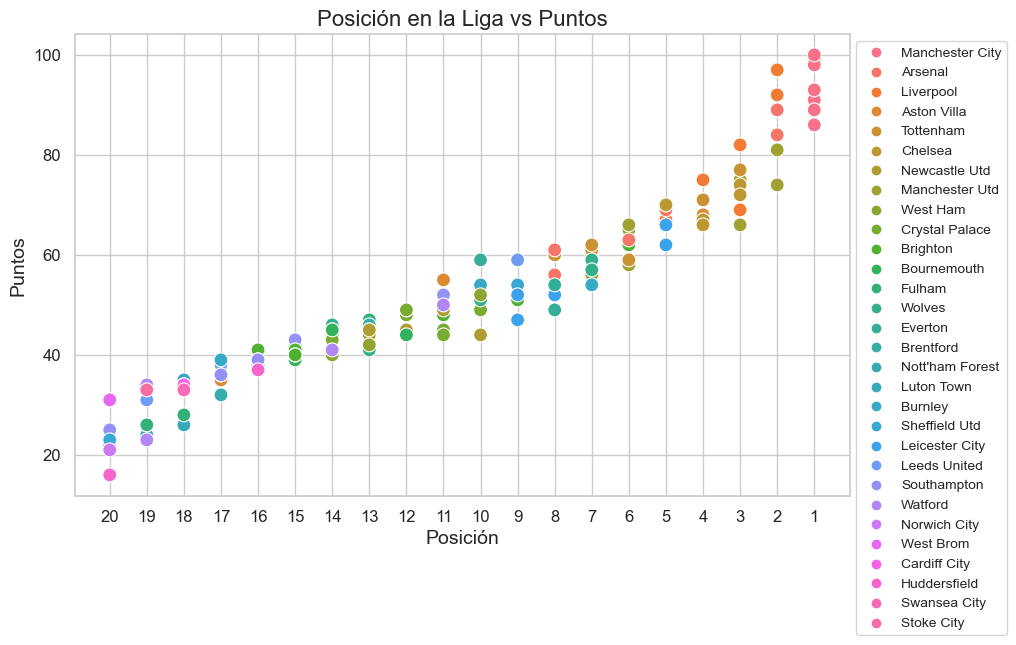

In [300]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Posición', y='Pts', data=Partidos, hue='Equipo', s=100)

plt.title('Posición en la Liga vs Puntos', fontsize=16)
plt.xlabel('Posición', fontsize=14)
plt.ylabel('Puntos', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Invertir el eje x
plt.gca().invert_xaxis()

legend = scatter.legend_
for text in legend.get_texts():
    text.set_fontsize(10)  

#posicion de la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.show()

In [127]:
print(Partidos.dtypes)


Posición              object
Equipo                object
PJ                     int64
PG                     int64
PE                     int64
PP                     int64
GF                     int64
GC                     int64
DG                    object
Pts                    int64
Pts/PJ                object
xG                   float64
xGA                  float64
xGD                   object
xGD/90                object
Asistencia            object
Portero               object
Temporada             object
Goles Metidos          int64
Maximo Goleador 1     object
Maximo Goleador 2     object
dtype: object


In [77]:
Numericas = ['PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'Pts', 'xG', 'xGA', 'Goles Metidos']
for col in Numericas:
    Partidos[col] = pd.to_numeric(Partidos[col], errors='coerce')

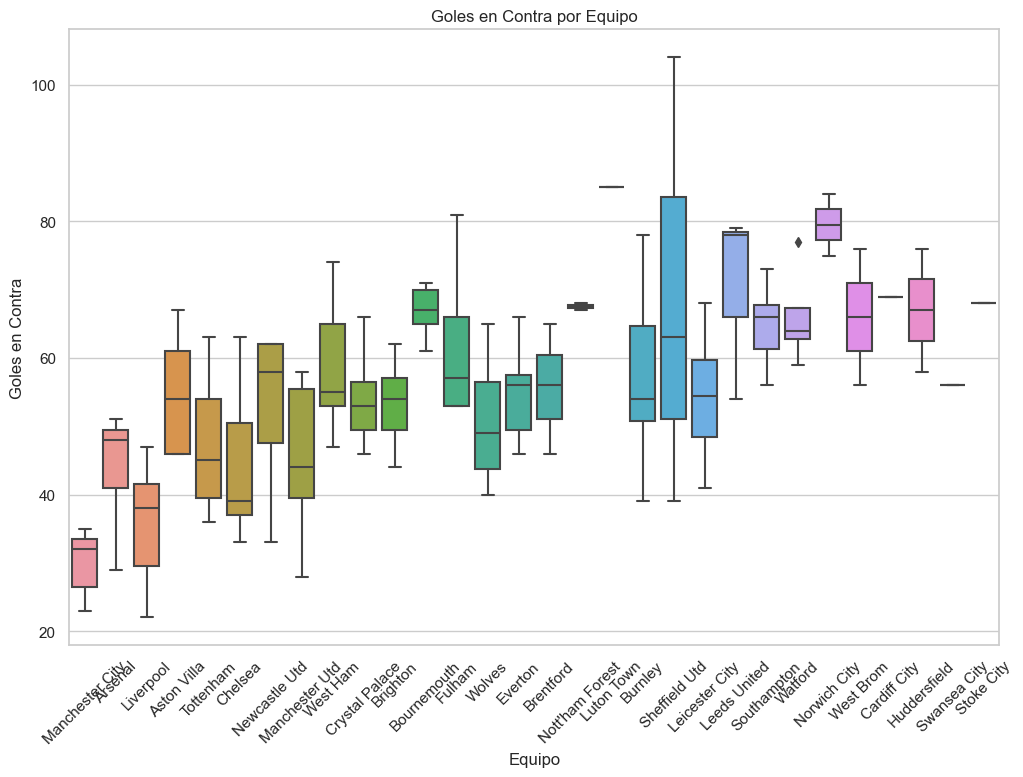

In [78]:
# Boxplot de goles en contra (GC) por equipo
plt.figure(figsize=(12, 8))
sns.boxplot(x='Equipo', y='GC', data=Partidos)
plt.title('Goles en Contra por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Goles en Contra')
plt.xticks(rotation=45)
plt.show()


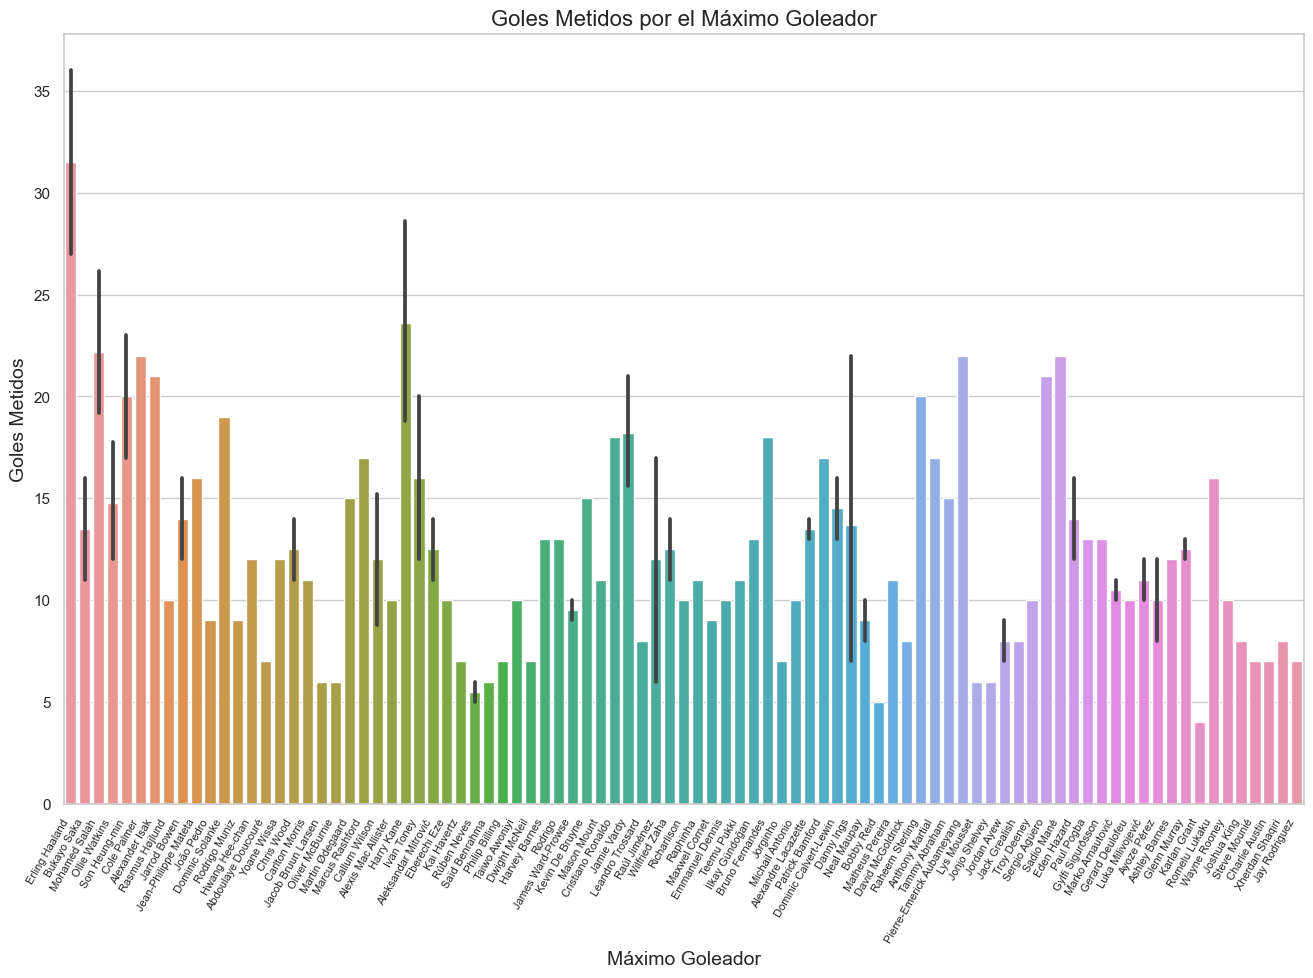

In [298]:
plt.figure(figsize=(16, 10))

sns.barplot(x='Maximo Goleador 1', y='Goles Metidos', data=Partidos)

plt.title('Goles Metidos por el Máximo Goleador', fontsize=16)
plt.xlabel('Máximo Goleador', fontsize=14)
plt.ylabel('Goles Metidos', fontsize=14)

plt.xticks(rotation=60, fontsize=8, ha='right')

plt.show()

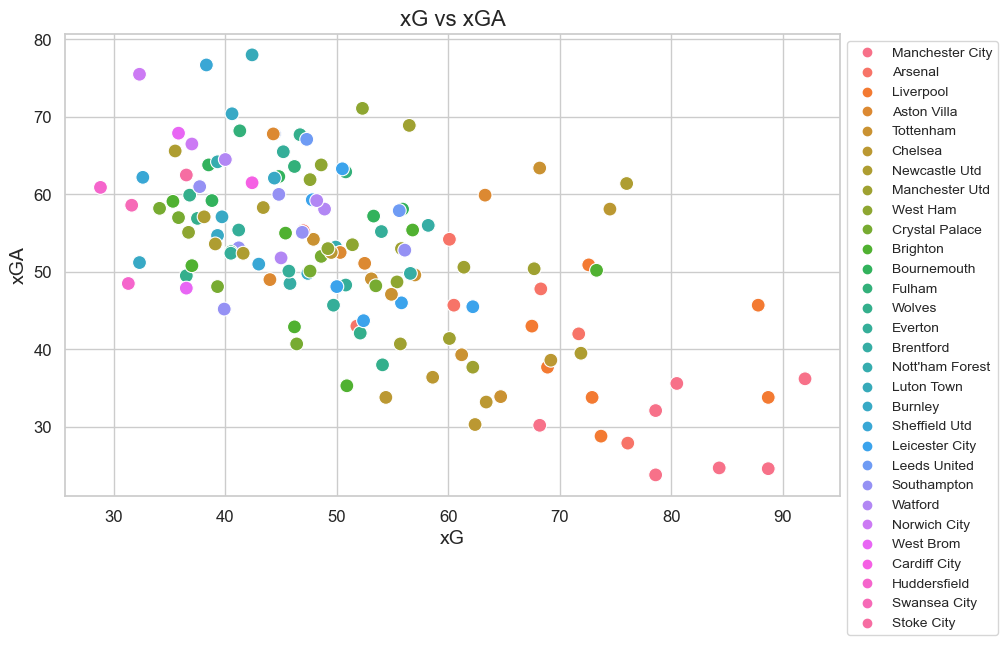

In [294]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(x='xG', y='xGA', data=Partidos, hue='Equipo', s=100)

plt.title('xG vs xGA', fontsize=16)
plt.xlabel('xG', fontsize=14)
plt.ylabel('xGA', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

legend = scatter.legend_
for text in legend.get_texts():
    text.set_fontsize(10) 

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.show()

C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\1751402702.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Partidos_top_5[col] = pd.to_numeric(Partidos_top_5[col], errors='coerce')


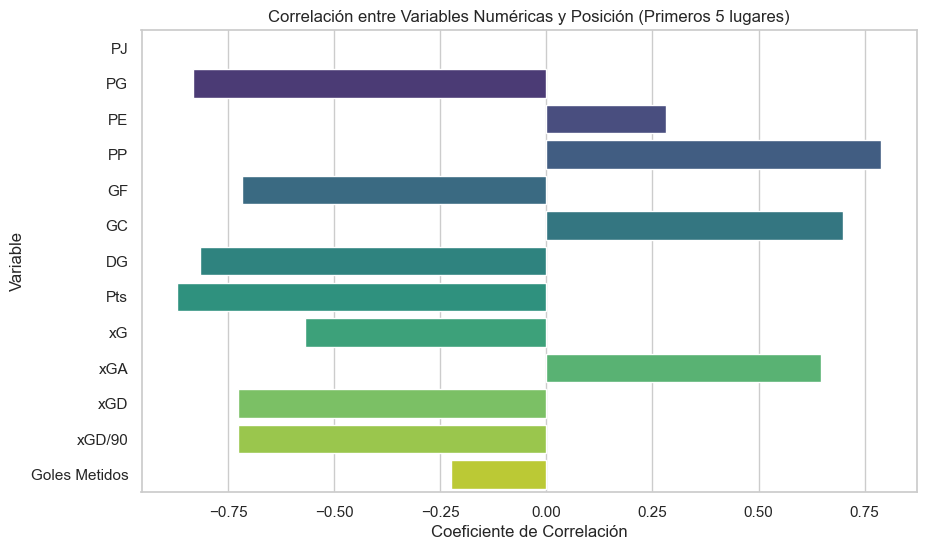

In [142]:
# Filtrar las primeras 5 posiciones
Partidos_top_5 = Partidos[Partidos['Posición'].astype(int).between(1, 5)]

# Convertir columnas numéricas si es necesario
Numericas = ['PJ', 'PG', 'PE', 'PP', 'GF', 'GC', 'DG', 'Pts', 'xG', 'xGA', 'xGD', 'xGD/90', 'Goles Metidos']
for col in Numericas:
    Partidos_top_5[col] = pd.to_numeric(Partidos_top_5[col], errors='coerce')

# Calcular la matriz de correlación
correlation_matrix = Partidos_top_5[Numericas + ['Posición']].corr()

# Filtrar solo la correlación con la posición
correlation_with_position = correlation_matrix['Posición'].drop('Posición')

# Crear un gráfico de barras para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_position.values, y=correlation_with_position.index, palette='viridis')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variable')
plt.title('Correlación entre Variables Numéricas y Posición (Primeros 5 lugares)')
plt.show()

In [147]:
nombres_goleadores = Partidos['Maximo Goleador 1'].unique()

# Crear un diccionario para mapear nombres a números
nombre_a_numero = {nombre: idx + 1 for idx, nombre in enumerate(nombres_goleadores)}

# Crear una nueva columna con los números asignados
Partidos['Maximo Goleador 1_Numero'] = Partidos['Maximo Goleador 1'].map(nombre_a_numero)

# Aplicar one-hot encoding
Partidos_encoded = pd.get_dummies(Partidos, columns=['Maximo Goleador 1'], prefix='', prefix_sep='')

# Mostrar el DataFrame resultante
print(Partidos_encoded)

    Posición           Equipo  PJ  PG  PE  PP  GF  GC   DG  Pts  ...  \
0          1  Manchester City  38  28   7   3  96  34  +62   91  ...   
1          2          Arsenal  38  28   5   5  91  29  +62   89  ...   
2          3        Liverpool  38  24  10   4  86  41  +45   82  ...   
3          4      Aston Villa  38  20   8  10  76  61  +15   68  ...   
4          5        Tottenham  38  20   6  12  74  61  +13   66  ...   
..       ...              ...  ..  ..  ..  ..  ..  ..  ...  ...  ...   
135       16     Huddersfield  38   9  10  19  28  58  -30   37  ...   
136       17      Southampton  38   7  15  16  37  56  -19   36  ...   
137       18     Swansea City  38   8   9  21  28  56  -28   33  ...   
138       19       Stoke City  38   7  12  19  35  68  -33   33  ...   
139       20        West Brom  38   6  13  19  31  56  -25   31  ...   

    Steve Mounié  Taiwo Awoniyi  Tammy Abraham Teemu Pukki Troy Deeney  \
0          False          False          False       False   

In [150]:
manchester_city = Partidos[Partidos['Equipo'] == 'Manchester City']

In [151]:
manchester_city

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,xGA,xGD,xGD/90,Asistencia,Portero,Temporada,Goles Metidos,Maximo Goleador 1,Maximo Goleador 2,Maximo Goleador 1_Numero
0,1,Manchester City,38,28,7,3,96,34,+62,91,...,35.6,+44.9,+1.18,NaN,Ederson,2023-2024,27,Erling Haaland,None,1
20,1,Manchester City,38,28,5,5,94,33,+61,89,...,32.1,+46.5,+1.22,NaN,Ederson,2022-2023,36,Erling Haaland,None,1
40,1,Manchester City,38,29,6,3,99,26,+73,93,...,24.6,+64.0,+1.68,NaN,Ederson,2021-2022,15,Kevin De Bruyne,None,38
60,1,Manchester City,38,27,5,6,83,32,+51,86,...,30.2,+38.0,+1.00,526.0,Ederson,2020-2021,13,İlkay Gündoğan,None,50
81,2,Manchester City,38,26,3,9,102,35,+67,81,...,36.2,+55.7,+1.47,NaN,Ederson,2019-2020,20,Raheem Sterling,None,62
100,1,Manchester City,38,32,2,4,95,23,+72,98,...,24.7,+59.6,+1.57,NaN,Ederson,2018-2019,21,Sergio Agüero,None,71
120,1,Manchester City,38,32,4,2,106,27,+79,100,...,23.8,+54.8,+1.44,NaN,Ederson,2017-2018,21,Sergio Agüero,None,71


In [153]:
columnas_no_deseadas = ['Portero', 'Temporada', 'Goles Metidos', 'Equipo','Maximo Goleador 1']
variables_numericas = manchester_city.drop(columns=columnas_no_deseadas)

# Calcular la matriz de correlación
correlation_matrix = variables_numericas.corr()

# Filtrar la correlación con la columna GF
correlation_with_GF = correlation_matrix['GF'].drop('GF')

# Ordenar por valor absoluto (para ver la magnitud de la correlación)
correlation_with_GF = correlation_with_GF.abs().sort_values(ascending=False)

# Mostrar las variables con mayor correlación con GF
print(correlation_with_GF)

DG                          0.872927
xGD                         0.682034
xGD/90                      0.681852
xG                          0.679661
PG                          0.366328
Pts/PJ                      0.339919
Pts                         0.337633
Posición                    0.337615
Maximo Goleador 1_Numero    0.261929
PP                          0.219469
PE                          0.196137
GC                          0.183476
xGA                         0.178328
PJ                               NaN
Asistencia                       NaN
Maximo Goleador 2                NaN
Name: GF, dtype: float64


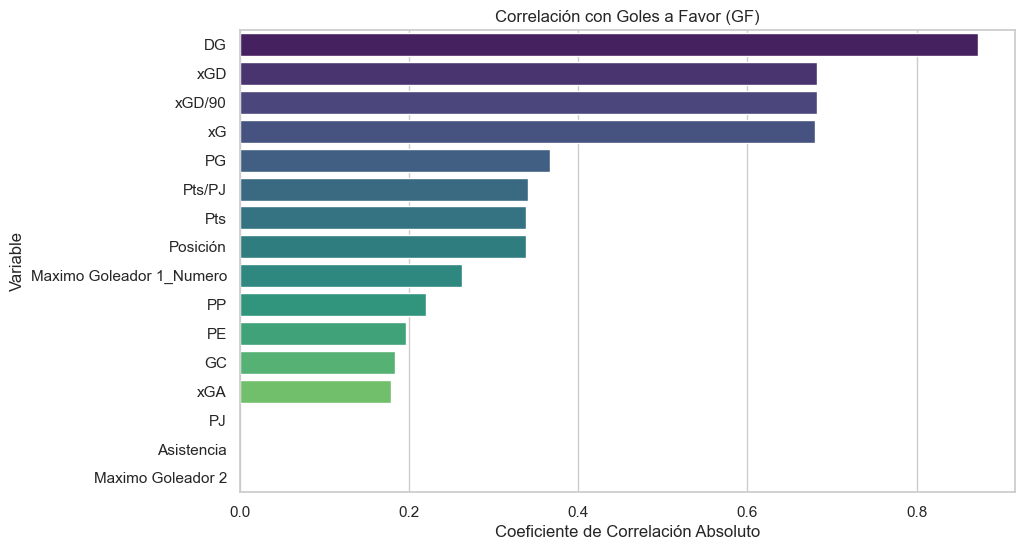

In [154]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_GF.values, y=correlation_with_GF.index, palette='viridis')
plt.xlabel('Coeficiente de Correlación Absoluto')
plt.ylabel('Variable')
plt.title('Correlación con Goles a Favor (GF)')
plt.show()

In [155]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

In [183]:
# Seleccionar variables
x1 = "DG"
x2 = "xG"
y = "GF"

# Convertir columnas a tipo numérico si es necesario
manchester_city[x1] = pd.to_numeric(manchester_city[x1])
manchester_city[x2] = pd.to_numeric(manchester_city[x2])
manchester_city[y] = pd.to_numeric(manchester_city[y])

# Crear modelo de regresión lineal para predecir DG
modelo_DG = LinearRegression()
modelo_DG.fit(manchester_city[[x2]], manchester_city[x1])

# Crear modelo de regresión lineal para predecir xGD
modelo_xGD = LinearRegression()
modelo_xGD.fit(manchester_city[[x1]], manchester_city[x2])

# Crear modelo de regresión lineal para predecir GF
modelo_GF = LinearRegression()
modelo_GF.fit(manchester_city[[x1, x2]], manchester_city[y])

# Valores actuales de DG y xGD para la próxima predicción
DG_actual = manchester_city[x1].iloc[1]
xGD_actual = manchester_city[x2].iloc[1]

# Predecir DG y xGD para el próximo dato
DG_predicho = modelo_DG.predict([[xGD_actual]])
xGD_predicho = modelo_xGD.predict([[DG_actual]])

# Crear dataframe para la nueva predicción
prediccion_nueva = pd.DataFrame({x1: [DG_predicho[0]], x2: [xGD_predicho[0]]})

C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3641166526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester_city[x1] = pd.to_numeric(manchester_city[x1])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3641166526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester_city[x2] = pd.to_numeric(manchester_city[x2])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3641166526.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [184]:
prediccion_nueva

,DG,xG
0,64.337513,78.864046


Coeficientes: [0.56650247 0.23385639]
Intercepción: 39.723962598956305
Ecuación del plano: y = 0.567 * DG + 0.234 * xG + 39.724
Coeficiente de determinación: 0.803


C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\2412691265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester_city[x1] = pd.to_numeric(manchester_city[x1])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\2412691265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manchester_city[x2] = pd.to_numeric(manchester_city[x2])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\2412691265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

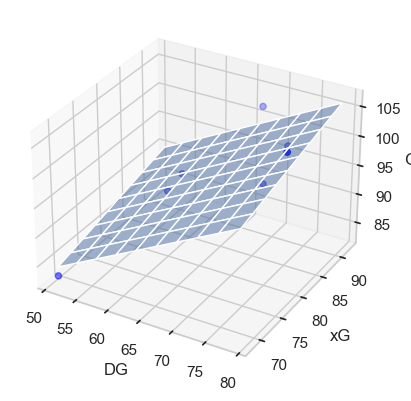

In [181]:
# Seleccionar variables
x1 = "DG"
x2 = "xG"
y = "GF"

manchester_city[x1] = pd.to_numeric(manchester_city[x1])
manchester_city[x2] = pd.to_numeric(manchester_city[x2])
manchester_city[y] = pd.to_numeric(manchester_city[y])

# Crear modelo de regresión lineal
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()
modelo.fit(manchester_city[variables_x], manchester_city[variable_y])

# Imprimir coeficientes e intercepción
print('Coeficientes:', modelo.coef_)
print('Intercepción:', modelo.intercept_)

# Imprimir la ecuación del plano
print('Ecuación del plano: y = {:.3f} * {} + {:.3f} * {} + {:.3f}'.format(
    modelo.coef_[0], x1, modelo.coef_[1], x2, modelo.intercept_))

# Coeficiente de determinación (R²)
print('Coeficiente de determinación:', round(r2_score(manchester_city[variable_y], modelo.predict(manchester_city[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(manchester_city[x1], manchester_city[x2], manchester_city[y], color='blue')

# Crear un meshgrid para el plano
x = np.linspace(manchester_city[x1].min(), manchester_city[x1].max(), num=10)
y = np.linspace(manchester_city[x2].min(), manchester_city[x2].max(), num=10)
x, y = np.meshgrid(x, y)

# Calcular los valores z (GF) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y

# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("GF")
plt.show()

In [186]:
# Generar predicción automática utilizando datos históricos
GF_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de los goles a favor para el equipo manchester city basada en los valores históricos más recientes es', round(GF_prediccion[0], 3))


La predicción de los goles a favor para el equipo manchester city basada en los valores históricos más recientes es 94.614


# Hacer predicciones para cada equipo

Coeficientes: [0.29258809 0.70828411]
Intercepción: 17.16198905022361
Ecuación del plano: y = 0.293 * DG + 0.708 * xG + 17.162
Coeficiente de determinación: 0.92


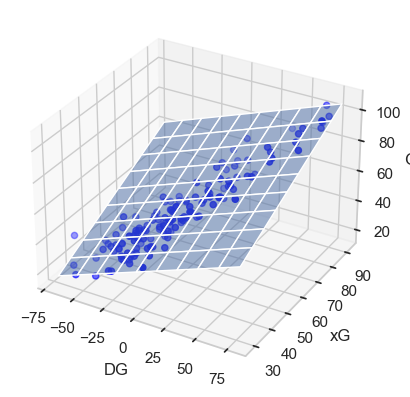

In [207]:
# Seleccionar variables
x1 = "DG"
x2 = "xG"
y = "GF"

Partidos[x1] = pd.to_numeric(Partidos[x1])
Partidos[x2] = pd.to_numeric(Partidos[x2])
Partidos[y] = pd.to_numeric(Partidos[y])

# Crear modelo de regresión lineal
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()
modelo.fit(Partidos[variables_x], Partidos[variable_y])

# Imprimir coeficientes e intercepción
print('Coeficientes:', modelo.coef_)
print('Intercepción:', modelo.intercept_)

# Imprimir la ecuación del plano
print('Ecuación del plano: y = {:.3f} * {} + {:.3f} * {} + {:.3f}'.format(
    modelo.coef_[0], x1, modelo.coef_[1], x2, modelo.intercept_))

# Coeficiente de determinación (R²)
print('Coeficiente de determinación:', round(r2_score(Partidos[variable_y], modelo.predict(Partidos[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Partidos[x1], Partidos[x2], Partidos[y], color='blue')

# Crear un meshgrid para el plano
x = np.linspace(Partidos[x1].min(), Partidos[x1].max(), num=10)
y = np.linspace(Partidos[x2].min(), Partidos[x2].max(), num=10)
x, y = np.meshgrid(x, y)

# Calcular los valores z (GF) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y

# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("GF")
plt.show()

In [210]:
equipos_unicos = Partidos['Equipo'].unique()

# Diccionarios para almacenar las predicciones por equipo
predicciones_DG = {}
predicciones_xG = {}
predicciones_GF = {}

# Iterar sobre cada equipo único
for equipo in equipos_unicos:
    # Filtrar los datos solo para el equipo actual
    datos_equipo = Partidos[Partidos['Equipo'] == equipo]
    
    # Seleccionar variables
    x1 = "DG"
    x2 = "xG"
    y = "GF"
    
    # Convertir columnas a tipo numérico si es necesario
    datos_equipo[x1] = pd.to_numeric(datos_equipo[x1])
    datos_equipo[x2] = pd.to_numeric(datos_equipo[x2])
    datos_equipo[y] = pd.to_numeric(datos_equipo[y])
    
    # Crear modelo de regresión lineal para predecir DG
    modelo_DG = LinearRegression()
    modelo_DG.fit(datos_equipo[[x2]], datos_equipo[x1])
    
    # Crear modelo de regresión lineal para predecir xG
    modelo_xG = LinearRegression()
    modelo_xG.fit(datos_equipo[[x1]], datos_equipo[x2])
    
    # Crear modelo de regresión lineal para predecir GF
    modelo_GF = LinearRegression()
    modelo_GF.fit(datos_equipo[[x1, x2]], datos_equipo[y])
    
    # Valores actuales de DG y xG para la próxima predicción
    DG_actual = datos_equipo[x1].iloc[-1]
    xG_actual = datos_equipo[x2].iloc[-1]
    
    # Predecir DG y xG para el próximo dato
    DG_predicho = modelo_DG.predict([[xG_actual]])
    xG_predicho = modelo_xG.predict([[DG_actual]])
    
    # Crear dataframe para la nueva predicción
    prediccion_nueva = pd.DataFrame({x1: [DG_predicho[0]], x2: [xG_predicho[0]]})
    
    # Predicción de GF para el próximo dato
    GF_prediccion = modelo_GF.predict(prediccion_nueva)
    
    # Almacenar las predicciones en los diccionarios por equipo
    predicciones_DG[equipo] = DG_predicho[0]
    predicciones_xG[equipo] = xG_predicho[0]
    predicciones_GF[equipo] = GF_prediccion[0]  # Tomar el valor de la predicción directamente

# Crear nuevas columnas en el DataFrame original Partidos con las predicciones esperadas
Partidos['DG_ESPERADO'] = Partidos['Equipo'].map(predicciones_DG)
Partidos['xG_ESPERADO'] = Partidos['Equipo'].map(predicciones_xG)
Partidos['GF_ESPERADO'] = Partidos['Equipo'].map(predicciones_GF)

# Mostrar el DataFrame con las columnas añadidas
print(Partidos)

C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3869776175.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_equipo[x1] = pd.to_numeric(datos_equipo[x1])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3869776175.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_equipo[x2] = pd.to_numeric(datos_equipo[x2])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3869776175.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

    Posición           Equipo  PJ  PG  PE  PP  GF  GC  DG  Pts  ...  \
0          1  Manchester City  38  28   7   3  96  34  62   91  ...   
1          2          Arsenal  38  28   5   5  91  29  62   89  ...   
2          3        Liverpool  38  24  10   4  86  41  45   82  ...   
3          4      Aston Villa  38  20   8  10  76  61  15   68  ...   
4          5        Tottenham  38  20   6  12  74  61  13   66  ...   
..       ...              ...  ..  ..  ..  ..  ..  ..  ..  ...  ...   
135       16     Huddersfield  38   9  10  19  28  58 -30   37  ...   
136       17      Southampton  38   7  15  16  37  56 -19   36  ...   
137       18     Swansea City  38   8   9  21  28  56 -28   33  ...   
138       19       Stoke City  38   7  12  19  35  68 -33   33  ...   
139       20        West Brom  38   6  13  19  31  56 -25   31  ...   

    Asistencia            Portero  Temporada  Goles Metidos Maximo Goleador 1  \
0          NaN            Ederson  2023-2024             27    Erl

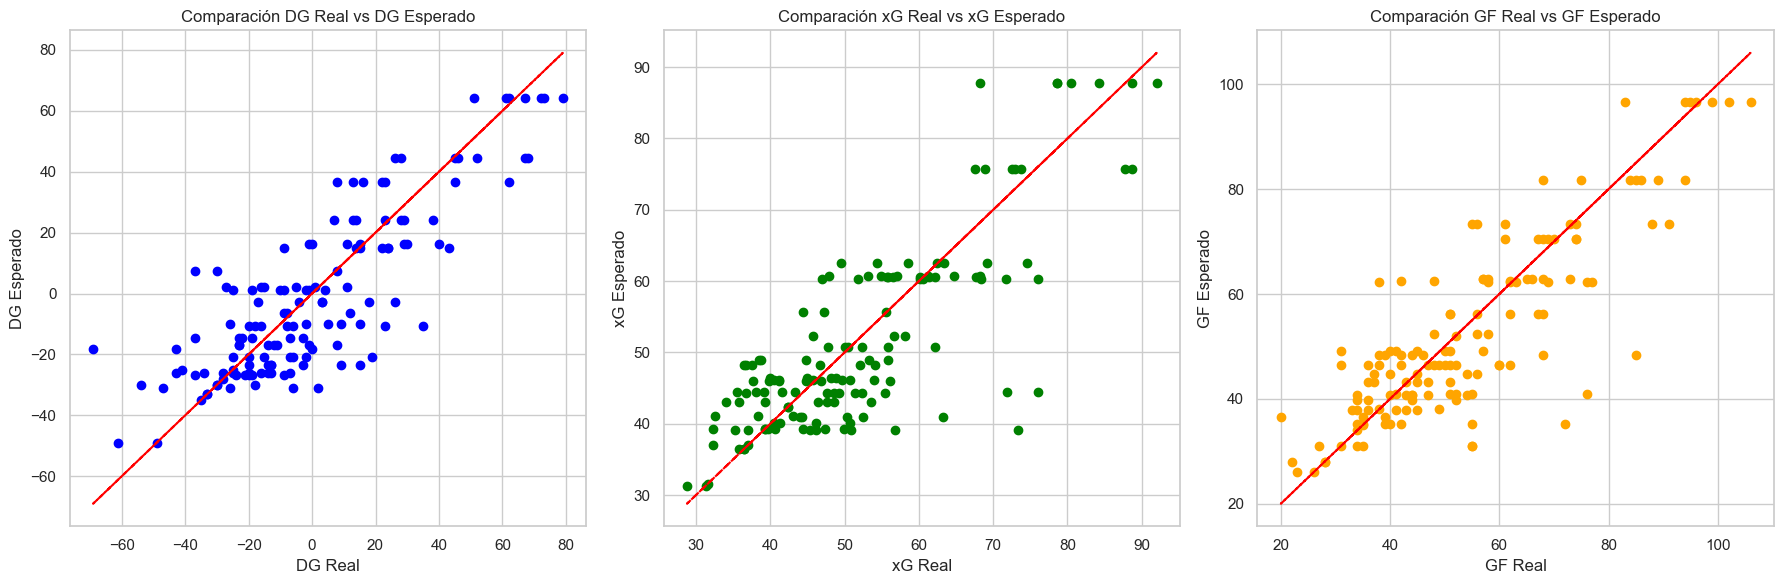

In [211]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico para DG
axs[0].scatter(Partidos['DG'], Partidos['DG_ESPERADO'], color='blue')
axs[0].plot(Partidos['DG'], Partidos['DG'], color='red', linestyle='--')
axs[0].set_xlabel('DG Real')
axs[0].set_ylabel('DG Esperado')
axs[0].set_title('Comparación DG Real vs DG Esperado')

# Gráfico para xG
axs[1].scatter(Partidos['xG'], Partidos['xG_ESPERADO'], color='green')
axs[1].plot(Partidos['xG'], Partidos['xG'], color='red', linestyle='--')
axs[1].set_xlabel('xG Real')
axs[1].set_ylabel('xG Esperado')
axs[1].set_title('Comparación xG Real vs xG Esperado')

# Gráfico para GF
axs[2].scatter(Partidos['GF'], Partidos['GF_ESPERADO'], color='orange')
axs[2].plot(Partidos['GF'], Partidos['GF'], color='red', linestyle='--')
axs[2].set_xlabel('GF Real')
axs[2].set_ylabel('GF Esperado')
axs[2].set_title('Comparación GF Real vs GF Esperado')

plt.tight_layout()
plt.show()

In [213]:
#Guardar predicciones
Partidos.to_csv('Partidos_prediccion.csv', index=False)

# Predecir quien ganara

In [269]:
Ganadores = Partidos[Partidos['Posición'] == "1"]

In [270]:
Ganadores

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,Asistencia,Portero,Temporada,Goles Metidos,Maximo Goleador 1,Maximo Goleador 2,Maximo Goleador 1_Numero,DG_ESPERADO,xG_ESPERADO,GF_ESPERADO
0,1,Manchester City,38,28,7,3,96,34,62,91,...,NaN,Ederson,2023-2024,27,Erling Haaland,None,1,64.337513,87.793788,96.702461
20,1,Manchester City,38,28,5,5,94,33,61,89,...,NaN,Ederson,2022-2023,36,Erling Haaland,None,1,64.337513,87.793788,96.702461
40,1,Manchester City,38,29,6,3,99,26,73,93,...,NaN,Ederson,2021-2022,15,Kevin De Bruyne,None,38,64.337513,87.793788,96.702461
60,1,Manchester City,38,27,5,6,83,32,51,86,...,526.0,Ederson,2020-2021,13,İlkay Gündoğan,None,50,64.337513,87.793788,96.702461
80,1,Liverpool,38,32,3,3,85,33,52,99,...,NaN,Alisson,2019-2020,19,Mohamed Salah,None,3,44.604428,75.665835,81.708721
100,1,Manchester City,38,32,2,4,95,23,72,98,...,NaN,Ederson,2018-2019,21,Sergio Agüero,None,71,64.337513,87.793788,96.702461
120,1,Manchester City,38,32,4,2,106,27,79,100,...,NaN,Ederson,2017-2018,21,Sergio Agüero,None,71,64.337513,87.793788,96.702461


In [279]:
mapeo = {
    'Manchester City': 1,
    'Liverpool': 2,
    # Añadir más equipos según sea necesario
}

# Aplicar el mapeo a la columna 'Equipo'
Ganadores['Equipo_numerico'] = Ganadores['Equipo'].map(mapeo)

C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\4097938424.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ganadores['Equipo_numerico'] = Ganadores['Equipo'].map(mapeo)


In [280]:
Ganadores

,Posición,Equipo,PJ,PG,PE,PP,GF,GC,DG,Pts,...,Portero,Temporada,Goles Metidos,Maximo Goleador 1,Maximo Goleador 2,Maximo Goleador 1_Numero,DG_ESPERADO,xG_ESPERADO,GF_ESPERADO,Equipo_numerico
0,1,Manchester City,38,28,7,3,96,34,62,91,...,Ederson,2023-2024,27,Erling Haaland,None,1,64.337513,87.793788,96.702461,1
20,1,Manchester City,38,28,5,5,94,33,61,89,...,Ederson,2022-2023,36,Erling Haaland,None,1,64.337513,87.793788,96.702461,1
40,1,Manchester City,38,29,6,3,99,26,73,93,...,Ederson,2021-2022,15,Kevin De Bruyne,None,38,64.337513,87.793788,96.702461,1
60,1,Manchester City,38,27,5,6,83,32,51,86,...,Ederson,2020-2021,13,İlkay Gündoğan,None,50,64.337513,87.793788,96.702461,1
80,1,Liverpool,38,32,3,3,85,33,52,99,...,Alisson,2019-2020,19,Mohamed Salah,None,3,44.604428,75.665835,81.708721,2
100,1,Manchester City,38,32,2,4,95,23,72,98,...,Ederson,2018-2019,21,Sergio Agüero,None,71,64.337513,87.793788,96.702461,1
120,1,Manchester City,38,32,4,2,106,27,79,100,...,Ederson,2017-2018,21,Sergio Agüero,None,71,64.337513,87.793788,96.702461,1


In [281]:
# Seleccionar variables
x1 = "Pts"
x2 = "PG"
y = "Equipo_numerico"

# Convertir columnas a tipo numérico si es necesario
Ganadores[x1] = pd.to_numeric(Ganadores[x1])
Ganadores[x2] = pd.to_numeric(Ganadores[x2])
Ganadores[y] = pd.to_numeric(Ganadores[y])

# Crear modelo de regresión lineal para predecir DG
modelo_DG = LinearRegression()
modelo_DG.fit(Ganadores[[x2]], Ganadores[x1])

# Crear modelo de regresión lineal para predecir xGD
modelo_xGD = LinearRegression()
modelo_xGD.fit(Ganadores[[x1]], Ganadores[x2])

# Crear modelo de regresión lineal para predecir GF
modelo_GF = LinearRegression()
modelo_GF.fit(Ganadores[[x1, x2]], Ganadores[y])

# Valores actuales de DG y xGD para la próxima predicción
DG_actual = Ganadores[x1].iloc[0]
xGD_actual = Ganadores[x2].iloc[0]

# Predecir DG y xGD para el próximo dato
DG_predicho = modelo_DG.predict([[xGD_actual]])
xGD_predicho = modelo_xGD.predict([[DG_actual]])

# Crear dataframe para la nueva predicción
prediccion_nueva = pd.DataFrame({x1: [DG_predicho[0]], x2: [xGD_predicho[0]]})

C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3673003753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ganadores[x1] = pd.to_numeric(Ganadores[x1])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3673003753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ganadores[x2] = pd.to_numeric(Ganadores[x2])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\3673003753.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [282]:
prediccion_nueva

,Pts,PG
0,89.61165,28.624593


Coeficientes: [-0.02681722  0.14184898]
Intercepción: -0.5589273112208883
Ecuación del plano: y = -0.027 * Pts + 0.142 * PG + -0.559
Coeficiente de determinación: 0.213


C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\1239500931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ganadores[x1] = pd.to_numeric(Ganadores[x1])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\1239500931.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ganadores[x2] = pd.to_numeric(Ganadores[x2])
C:\Users\bc.mgutierrez\AppData\Local\Temp\ipykernel_79648\1239500931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

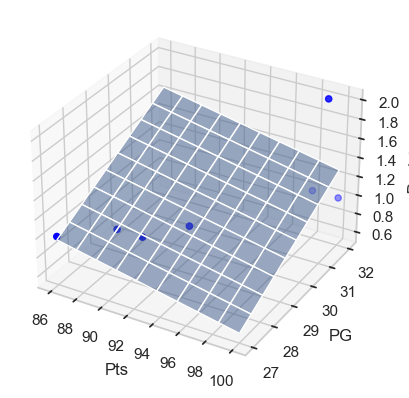

In [283]:
# Seleccionar variables
x1 = "Pts"
x2 = "PG"
y = "Equipo_numerico"

Ganadores[x1] = pd.to_numeric(Ganadores[x1])
Ganadores[x2] = pd.to_numeric(Ganadores[x2])
Ganadores[y] = pd.to_numeric(Ganadores[y])

# Crear modelo de regresión lineal
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()
modelo.fit(Ganadores[variables_x], Ganadores[variable_y])

# Imprimir coeficientes e intercepción
print('Coeficientes:', modelo.coef_)
print('Intercepción:', modelo.intercept_)

# Imprimir la ecuación del plano
print('Ecuación del plano: y = {:.3f} * {} + {:.3f} * {} + {:.3f}'.format(
    modelo.coef_[0], x1, modelo.coef_[1], x2, modelo.intercept_))

# Coeficiente de determinación (R²)
print('Coeficiente de determinación:', round(r2_score(Ganadores[variable_y], modelo.predict(Ganadores[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Ganadores[x1], Ganadores[x2], Ganadores[y], color='blue')

# Crear un meshgrid para el plano
x = np.linspace(Ganadores[x1].min(), Ganadores[x1].max(), num=10)
y = np.linspace(Ganadores[x2].min(), Ganadores[x2].max(), num=10)
x, y = np.meshgrid(x, y)

# Calcular los valores z (GF) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y

# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Posición")
plt.show()

In [287]:
# Generar predicción automática utilizando datos históricos
GF_prediccion = modelo.predict(prediccion_nueva)
nombre_equipo = Ganadores.loc[0, 'Equipo']
# Imprimir el resultado con el nombre del equipo
print(f'El proximo equipo que janadara la jornada es {nombre_equipo}, {GF_prediccion}')


El proximo equipo que janadara la jornada es Manchester City, [1.09830659]
